1. Importing libraries 

In [154]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os,random
import eda_helper_functions

Setting display options

In [24]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data

In [18]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [19]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [20]:
data = get_data("gurgaon_properties_cleaned_v2")

3. Premilinary Analysis of the data 

In [21]:
(
    data 
    .sample(3)
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
3370,flat,ild greens,sector 37,0.79,4476.0,1765.0,Built Up area: 1765 (163.97 sq.m.),4,4,2,7.0,na,undefined,NaN,1765.0,NaN,0,0,0,0,0,2,51
651,house,independent,sector 12,0.58,5658.0,1025.0,Plot area 1025(95.23 sq.m.),4,2,1,2.0,East,Old Property,NaN,1025.0,NaN,0,0,0,1,0,2,7
3181,flat,deepak minda,sector 1,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3,3,3+,6.0,north-west,Moderately Old,NaN,NaN,2650.0,0,1,0,0,0,2,7


In [22]:
# checking the shape of the data 
(
    data 
    .shape
)

(3942, 23)

- data has `3942` rows and `23` columns 

In [25]:
# checking the datatypes 

(
    data 
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property type        3942 non-null   object 
 1   society              3941 non-null   object 
 2   sector               3942 non-null   object 
 3   price                3922 non-null   float64
 4   price_per_sq_ft      3922 non-null   float64
 5   area                 3922 non-null   float64
 6   areaWithType         3942 non-null   object 
 7   bedRoom              3942 non-null   int64  
 8   bathroom             3942 non-null   int64  
 9   balcony              3942 non-null   object 
 10  floorNum             3940 non-null   float64
 11  facing               3651 non-null   object 
 12  agePossession        3942 non-null   object 
 13  super_built_up_area  1934 non-null   float64
 14  built_up_area        1829 non-null   float64
 15  carpet_area          2001 non-null   f

In [26]:
# checking for duplicate rows 

(
    data 
    .duplicated()
    .sum()
)

np.int64(129)

- data has around `129` duplicate rows
- dropping these duplicate rows 

In [27]:
(
    data 
    .drop_duplicates(inplace= True)
)

In [28]:
(
    data 
    .head()
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
0,flat,ats kocoon,sector 109,1.70,9742.0,1745.0,Super Built up area 1745(162.12 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.),3,3,3,22.0,east,Relatively New,1745.0,1550.0,NaN,0,0,0,0,0,2,74
1,house,independent,sector 36,0.66,7168.0,921.0,Built Up area: 823 (76.46 sq.m.),2,2,3,4.0,NaN,New Property,NaN,823.0,NaN,0,0,0,0,0,2,0
2,flat,gls arawali homes,sector 163,0.28,4938.0,567.0,Super Built up area 567(52.68 sq.m.)Built Up area: 500 sq.ft. (46.45 sq.m.)Carpet area: 467 sq.ft. (43.39 sq.m.),2,2,2,3.0,east,Relatively New,567.0,500.0,467.0,0,0,0,0,0,0,42
3,flat,breez global heights,sector 36,0.24,5825.0,412.0,Carpet area: 412 (38.28 sq.m.),1,1,1,8.0,na,New Property,NaN,NaN,412.0,0,0,0,0,0,0,57
4,house,rwa sector 46,sector 46,4.50,24390.0,1845.0,Plot area 204(170.57 sq.m.)Built Up area: 206 sq.yards (172.24 sq.m.)Carpet area: 205 sq.yards (171.41 sq.m.),6,6,3+,3.0,North-East,Moderately Old,NaN,206.0,205.0,0,0,1,0,0,0,80


## 5. Univariate Analysis

5.1 property_type

<Axes: xlabel='property type'>

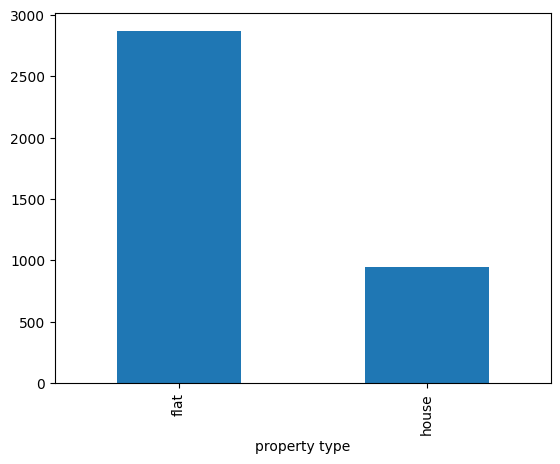

In [81]:
(
    data['property type']
    .value_counts()
    .plot(kind = 'bar')
)

In [88]:
(
    data['property type']
    .value_counts(normalize= True) * 100
)

property type
flat     75.242591
house    24.757409
Name: proportion, dtype: float64

In [89]:
(
    data['property type']
    .isnull() 
    .sum()
)

np.int64(0)

Observation 
- flats are in majority with around 75% of the data and there are less numbers of houses
- there are no missing values in the data 

5.2 Society

In [91]:
# quick glance 

(
    data
    .society
    .sample(10)
)

3066              ansal estella
136     shree vardhman victoria
2461                independent
1731             vatika gurgaon
1445               senate court
1147                 sobha city
1533          indiabulls enigma
3936                independent
3706                ss the leaf
1300     bestech park view city
Name: society, dtype: object

In [92]:
(
    data 
    .society
    .value_counts()
)

society
independent                                          558
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  41
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
dlf the ultima                                        31
paras dews                                            31
m3m woodshire                                         30
dlf regal gardens                                     30
shree vardhman flora                                  29
la vida by tata housing                               28
smart world gems                                      28
godrej nature plus                                    27
signature global solera

In [93]:
(
    data 
    .society
    .nunique()
)

722

Observation
- this column has high cardinality i.e. there are almost 722 categories. 
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 

In [102]:
(
    data[data.society != 'independent']
    .society
    .value_counts(normalize= True)
    .cumsum()
    .head(75)
)

society
tulip violet                            0.023049
ss the leaf                             0.045482
shapoorji pallonji joyville gurugram    0.058390
dlf new town heights                    0.070990
signature global park                   0.081746
shree vardhman victoria                 0.092194
emaar mgf emerald floors premier        0.102028
smart world orchard                     0.111862
paras dews                              0.121389
dlf the ultima                          0.130916
dlf regal gardens                       0.140135
m3m woodshire                           0.149355
shree vardhman flora                    0.158267
la vida by tata housing                 0.166872
smart world gems                        0.175476
signature global solera                 0.183774
godrej nature plus                      0.192071
bptp terra                              0.199754
experion the heartsong                  0.207130
tata primanti                           0.214505
vatika gurga

Observation
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 

In [185]:
# creating bins for the number of flats in a apartment to check how many apartments have multiple flats vacant 

society_counts = (
    data 
    .society 
    .value_counts()
)

frequency_bins = {
    "Very High > 100": (society_counts > 100).sum(), 
    "High (50-100)": ((society_counts > 50) & (society_counts < 100)).sum(), 
    "Average (10-49)": ((society_counts > 10) & (society_counts < 50)).sum(), 
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(), 
    "Very Low (1)": (society_counts ==1).sum()
}

for key, value in frequency_bins.items():
    print("{}\t:\t{}".format(key, value))

Very High > 100	:	1
High (50-100)	:	2
Average (10-49)	:	86
Low (2-9)	:	287
Very Low (1)	:	340


Observation: 
- society column explains that: 
    - There are: 
        - 1 apartment with more 100 flats 
        - 2 apartments with 50-100 flats 
        - 86 apartments with 10-49 flats 
        - 287 apartments with 2-9 flats and 
        - 340 apartments with just one flat 

<Axes: xlabel='society'>

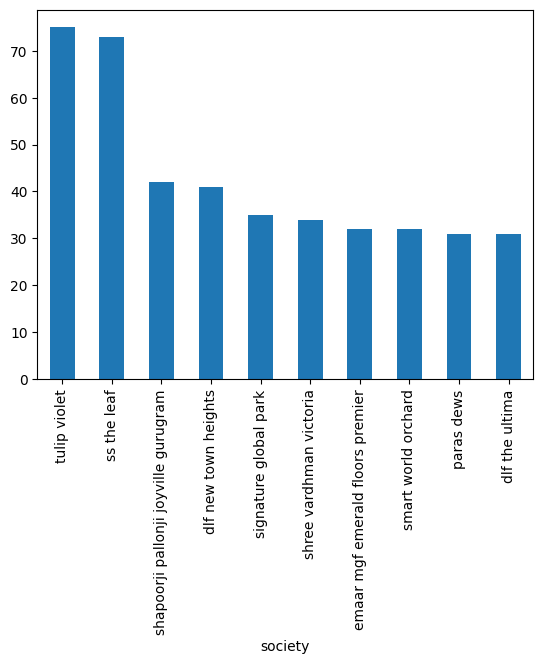

In [124]:
# top 10 societies 

(
    data[data['society'] != 'independent']
    .society
    .value_counts()
    .head(10)
    .plot(kind = 'bar')
    
)

In [125]:
# checking for missing values 

(
    data 
    .society
    .isna()
    .sum()
)

np.int64(1)

In [128]:
(
    data[data 
    .society
    .isnull()]
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2022,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,No,NaN,na,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,2,0


In [186]:
def cat_col_summary(df, var):

    # quick glance 
    print("Quick glance")
    print("="*15)

    print(df[var].sample(10))
    print("="*50)

    # bar chart 
    df[var].value_counts().head(10).plot(kind = 'bar', title = "Top 10 categories")

    # cardinality check 
    print("Cardinality in the column: ")
    print(df[var].nunique())
    print("="*50)

    # missing values 
    print("Number of missing values in the column: ")
    null_values = df[var].isnull()
    print(null_values.sum())
    print("="*50)

    print("Frequency bins")
    counts = (
    df[var] 
    .value_counts()
    )

    frequency_bins = {
        "Very High > 100": (counts > 100).sum(), 
        "High (50-100)": ((counts > 50) & (counts < 100)).sum(), 
        "Average (10-49)": ((counts > 10) & (counts < 50)).sum(), 
        "Low (2-9)": ((counts > 1) & (counts < 10)).sum(), 
        "Very Low (1)": (counts ==1).sum()
    }

    for key, value in frequency_bins.items():
        print("{}\t:\t{}".format(key, value))


    

Quick glance
3179                   signature global park
2950    shapoorji pallonji joyville gurugram
3270                  experion the heartsong
1807                                  dlf 76
1208                             green homes
2631             bestech park view residency
2095                      imperia the esfera
2366                          assotech blith
3069                            tulip violet
2612                             independent
Name: society, dtype: object
Cardinality in the column: 
722
Number of missing values in the column: 
1
Frequency bins
Very High > 100	:	1
High (50-100)	:	2
Average (10-49)	:	86
Low (2-9)	:	287
Very Low (1)	:	340


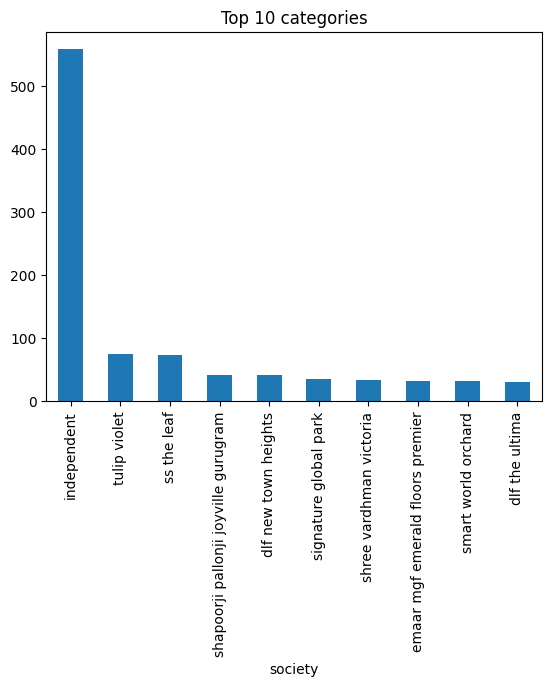

In [187]:
cat_col_summary(data, 'society')

Observation 
- flats are in majority with around 75% of the data and there are less numbers of houses
- there are no missing values in the data
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 
- society column explains that: 
    - There are: 
        - 1 apartment with more 100 flats 
        - 2 apartments with 50-100 flats 
        - 86 apartments with 10-49 flats 
        - 287 apartments with 2-9 flats and 
        - 340 apartments with just one flat 
- there is one missing value 

5.2 Sector

Quick glance
3234      sector 5
2651     sector 69
2509      sector 5
894       sector 9
3818     sector 24
1096     sector 92
2278    sector 107
1694     sector 38
3867    sector 108
508       sector 8
Name: sector, dtype: object
Cardinality in the column: 
103
Number of missing values in the column: 
0
Frequency bins
Very High > 100	:	5
High (50-100)	:	23
Average (10-49)	:	54
Low (2-9)	:	15
Very Low (1)	:	4


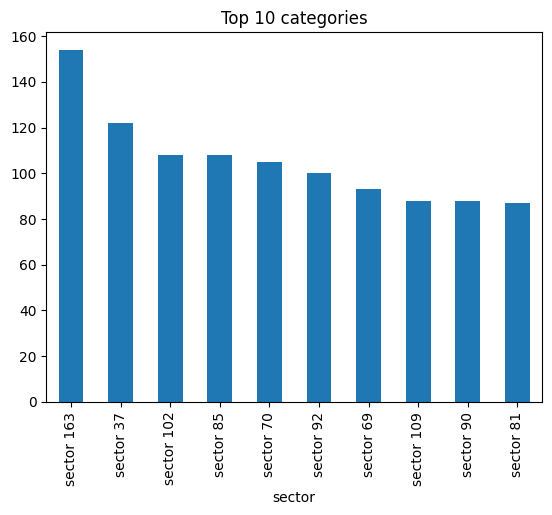

In [188]:
cat_col_summary(data, 'sector')

Observation: 
- There are 103 unique values in the `sectors`. 
- Frequency distribution of sectors: 
    - Very High > 100	:	5
    - High (50-100)	:	23
    - Average (10-49)	:	54
    - Low (2-9)	:	15
    - Very Low (1)	:	4
- there are 0 missing values in this column

5.3 Price

In [260]:
def num_col_summary(df, var):

    print("Quick Glance")
    print(df[var].sample(10))
    print("="*50)
    print()


    # 5 number summary 
    print("Basic summary of the data: ")
    print(df[var].describe())
    print("="*50)

    # skewness and kurtosis 
    print("Skewness: \t{:.2f} ".format(df[var].skew()))
    print("Kurtosis: \t{:.2f}".format(df[var].kurt()))
    print("="*50)

    # missing values 
    print("Number of missing values in the column: ")
    null_values = df[var].isnull()
    print(null_values.sum())
    print("="*50)

    # quantile analysis
    print("Quantile analysis")
    quantiles = df[var].quantile([0.01, 0.05, 0.95, 0.99])
    print(quantiles)

    # identification of outliers using the IQR method
    iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
    print("IQR: ", iqr)


    # plot
    plt.figure(figsize= (8, 4))
    sns.histplot(df[var], kde = True, bins = 50)
    plt.title("Distribution")

    # boxplot 
    plt.figure(figsize= (8, 4))
    sns.boxplot(x =df[var], color= 'lightgreen')
    plt.title("Box and whiskers plot")

    


Quick Glance
3679    11.00
1240      NaN
1118     1.80
2436     1.20
2742     1.40
1292     0.90
1824     2.00
1567     1.35
3725     2.25
2340     1.88
Name: price, dtype: float64

Basic summary of the data: 
count    3794.000000
mean        2.489170
std         2.943189
min         0.070000
25%         0.910000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64
Skewness: 	3.33 
Kurtosis: 	15.46
Number of missing values in the column: 
19
Quantile analysis
0.01     0.2493
0.05     0.3700
0.95     8.4140
0.99    15.1280
Name: price, dtype: float64
IQR:  1.79


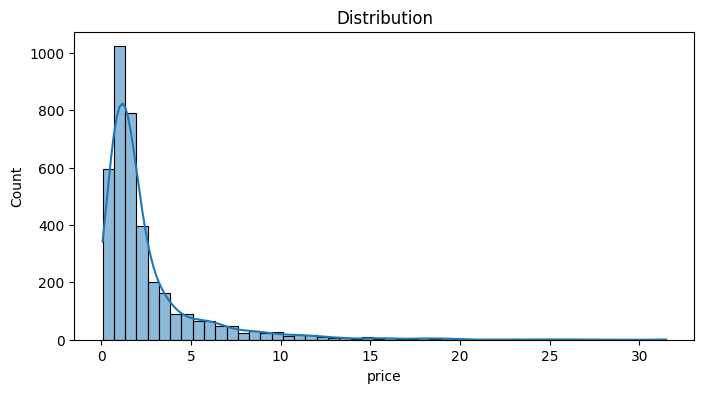

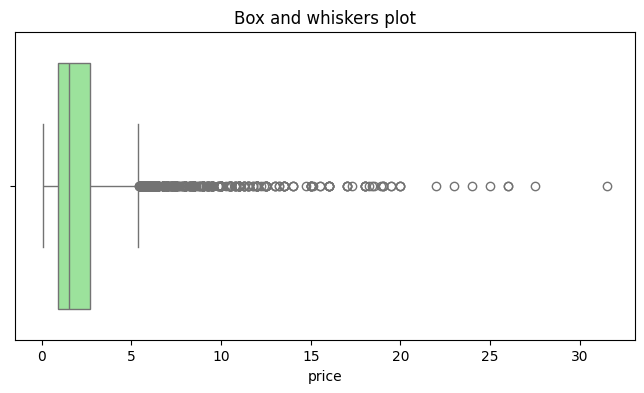

In [261]:
num_col_summary(data, 'price')

Observations:
- The average flat prices in gurgaon is almost 2.5 crores 
- std deviate of the price is 2.9 which shows there is lot of variance in the data 
- Min priced flat in gurgaon is around 7 lakh rupees 
- 25 % of the flats are priced around 91 lakhs 
- median flat prices is around 1.5 crores 

    - Visualization 
        - most costlies flat is priced around 31 crores due to which our data is right skewed. 
        - the price distribution is right skewed which means many flats are less priced and fewer flats are high priced 
        - Box and whisker plot shows the spread of the data and potential outliers. Properites above the price 10 crores can be considered as outliers and they lie beyond the upper whisker of the plot 
        - some flat are priced above the 20-25 crores which can create the bias in our machine learning model 
        - Histogram indicates that most flat prices are below 5 crores while fewer properies prices goes beyond 10 crores 
        
- There are 19 missising values in our data 
- Skewness of 3 is an indication that data is positively skewed. This means that the data is skewed to the right and it has longer right tail which aligns with our observation from the histogram as well. 
- Kurtosis is 15.46. A kurtosis value greater than 3 is an indication that distribution has heavier tails and more outliers compared to the normal distribution. 
- Based on quantile analysis: 
    - 1 % of the flats are priced below 0.25 crores 
    - 5% quantile: 5% of the properties are below 0.37 crores 
    - 95% quantile: 95% of the properties are below 8.41 crores 
    - 99% quantile: 99% of the prorperties are below 15 crores  

In [267]:
# outlier analysis using iqr 

q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr =q3-q1
print("IQR: ", iqr)

lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print("lower bound: ", lower_bound, ',', 'upper bound: ', upper_bound)

outliers = data[(data.price < lower_bound) | (data.price > upper_bound)]


IQR:  1.79
lower bound:  -1.775 , upper bound:  5.385


In [268]:
outliers.shape

(430, 23)

In [270]:
outliers.price.describe()

count    430.000000
mean       9.181581
std        4.077361
min        5.400000
25%        6.300000
50%        8.000000
75%       10.557500
max       31.500000
Name: price, dtype: float64

Outlier analysis: 
- Ther are 430 rows which are indicating the presence of outliers. 
- outliers have an average price around 9.18 crores 
- the range of outliers is from 5.40 crores to 31.5 crores 


<Axes: xlabel='price'>

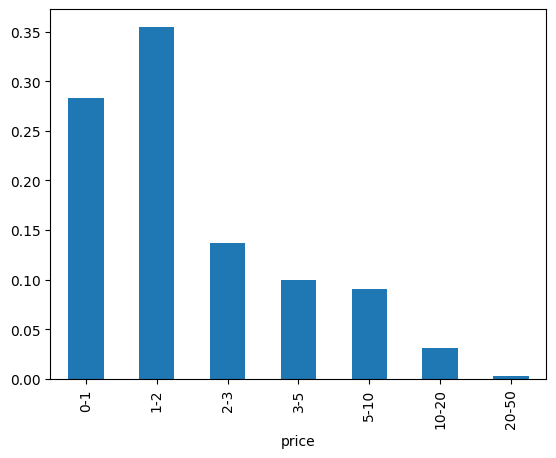

In [281]:
# price binning

bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']

(
    pd.cut(data['price'], bins = bins, labels= bin_labels, right= False)
    .value_counts(normalize= True)
    .sort_index()
    .plot(kind = 'bar')
    )



Observation 
- The majority of the properties are priced in the range of `0-3` crores. 
- There is a significant drop in the number of properites priced above 5 crores. 


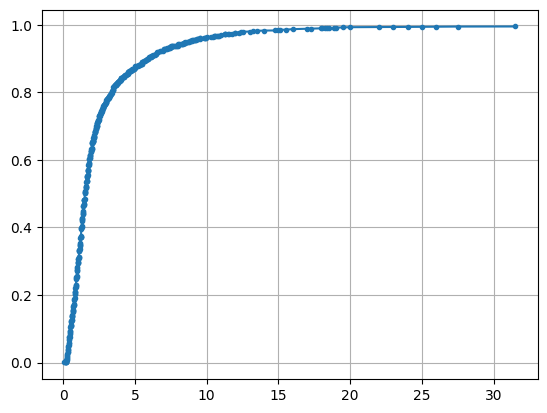

In [285]:
# ecdf analysis

ecdf = data.price.value_counts().sort_index().cumsum() / (len(data.price))
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = None)
plt.grid()

- Around 85% of the data falls below the 5 crores 
- Around 90% of the data is below 10 crores